In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('mandar_gurgaon_properties_cleaned_v2.csv')

In [3]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,umang monsoon breeze,sector 78,0.75,6053.0,1239.0,Built Up area: 1239 (115.11 sq.m.)Carpet area:...,2,2,1,...,NaN,1239.0,1100.0,0,0,0,0,0,0,0
1,flat,ireo skyon,sector 60,2.15,23344.0,921.0,Super Built up area 1524(141.58 sq.m.)Built Up...,2,3,2,...,1524.0,1250.0,921.0,0,1,0,0,0,1,49
2,flat,dlf regal gardens,sector 90,1.23,7052.0,1744.0,Super Built up area 1744(162.02 sq.m.),3,3,2,...,1744.0,NaN,NaN,0,0,0,0,1,0,6
3,house,independent,sector 2,5.00,15384.0,3250.0,Carpet area: 3250 (301.93 sq.m.),6,6,2,...,NaN,NaN,3250.0,0,0,0,0,0,0,0
4,flat,dlf the arbour,sector 63,7.52,19000.0,3958.0,Built Up area: 3956 (367.52 sq.m.)Carpet area:...,4,4,3,...,NaN,3956.0,2200.0,0,0,0,0,0,0,61


In [4]:
df.shape

(3803, 23)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3803 entries, 0 to 3802
Data columns (total 23 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   property_type        3803 non-null   object 
 1   society              3802 non-null   object 
 2   sector               3803 non-null   object 
 3   price                3785 non-null   float64
 4   price_per_sqft       3785 non-null   float64
 5   area                 3785 non-null   float64
 6   areaWithType         3803 non-null   object 
 7   bedRoom              3803 non-null   int64  
 8   bathroom             3803 non-null   int64  
 9   balcony              3803 non-null   object 
 10  floorNum             3784 non-null   float64
 11  facing               2698 non-null   object 
 12  agePossession        3803 non-null   object 
 13  super_built_up_area  1915 non-null   float64
 14  built_up_area        1733 non-null   float64
 15  carpet_area          1944 non-null   f

In [6]:
df.duplicated().sum()

126

In [7]:
# we remove the duplicate rows
df.drop_duplicates(inplace=True)

In [8]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,umang monsoon breeze,sector 78,0.75,6053.0,1239.0,Built Up area: 1239 (115.11 sq.m.)Carpet area:...,2,2,1,...,NaN,1239.0,1100.0,0,0,0,0,0,0,0
1,flat,ireo skyon,sector 60,2.15,23344.0,921.0,Super Built up area 1524(141.58 sq.m.)Built Up...,2,3,2,...,1524.0,1250.0,921.0,0,1,0,0,0,1,49
2,flat,dlf regal gardens,sector 90,1.23,7052.0,1744.0,Super Built up area 1744(162.02 sq.m.),3,3,2,...,1744.0,NaN,NaN,0,0,0,0,1,0,6
3,house,independent,sector 2,5.00,15384.0,3250.0,Carpet area: 3250 (301.93 sq.m.),6,6,2,...,NaN,NaN,3250.0,0,0,0,0,0,0,0
4,flat,dlf the arbour,sector 63,7.52,19000.0,3958.0,Built Up area: 3956 (367.52 sq.m.)Carpet area:...,4,4,3,...,NaN,3956.0,2200.0,0,0,0,0,0,0,61


### property_type
it is a categorical column - humein distribution samajhna hoga categories ka ie what is the frequency of each category

<Axes: xlabel='property_type'>

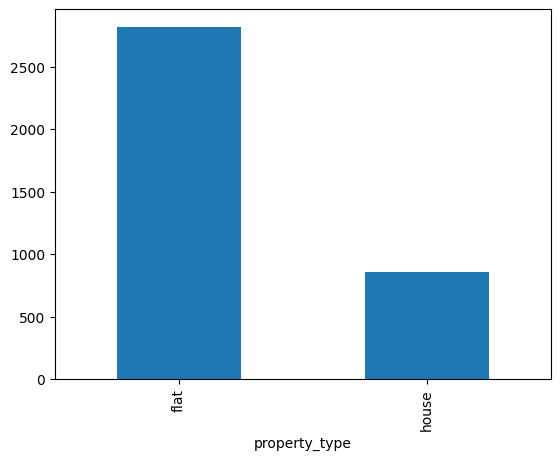

In [9]:
df['property_type'].value_counts().plot(kind='bar',)

#### Observations

- Flats are in majority(75 percent) and there are less number of houses(~25 percent)
- No missing values

### society

In [10]:
df['society'].value_counts().shape

(676,)

In [13]:
# this is a categorical column with very large number of categories ie 676
df['society'].value_counts()

society
independent                             486
tulip violet                             75
ss the leaf                              73
shapoorji pallonji joyville gurugram     42
dlf new town heights                     42
                                       ... 
maruti vihar                              1
vasant appartments                        1
huda                                      1
ansal sushant lok                         1
private house                             1
Name: count, Length: 676, dtype: int64

In [14]:
# we will keep the independent houses different and consider all the other houses which are in different societies in a temporary dataframe
# we will use value counts then normalize them and use cumulative sum on that
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

society
tulip violet                            0.023511
ss the leaf                             0.046395
shapoorji pallonji joyville gurugram    0.059561
dlf new town heights                    0.072727
signature global park                   0.083699
                                          ...   
puri emerald bay                        0.490282
ansal heights 86                        0.494357
ats kocoon                              0.498433
mvn athens                              0.502194
central park flower valley              0.505956
Name: proportion, Length: 75, dtype: float64

In [15]:
# from here we can observe that out of 675 categories, if we consider the top 75 societies then we have 50% data from them only
# ie for 675 societies there were 3600 flats
# so for top 75 societies there are 50% of the flats ie 1800 flats
# and baaki 600 societies se remaining 1800 flats aa rahe hai

In [16]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': 1,
 'High (50-100)': 2,
 'Average (10-49)': 92,
 'Low (2-9)': 273,
 'Very Low (1)': 308}

<Axes: xlabel='society'>

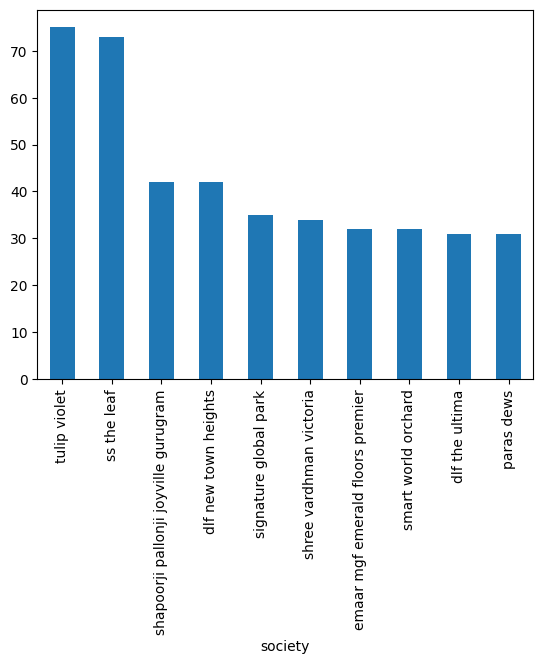

In [17]:
# top 10 socities
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

In [18]:
df['society'].isnull().sum()

1

In [19]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3638,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,0,0


#### Observations

- Around 13% properties comes under independent tag.
- There are 675 societies. 
- The top 75 societies have 50 percent of the preperties and the rest 50 percent of the properties come under the remaining 600 societies
    - Very High (>100): Only 1 society has more than 100 listings.
    - High (50-100): 2 societies have between 50 to 100 listings.
    - Average (10-49): 92 societies fall in this range with 10 to 49 listings each.
    - Low (2-9): 273 societies have between 2 to 9 listings.
    - Very Low (1): A significant number, 308 societies, have only 1 listing.
- 1 missing value

### sector

In [20]:
# unique sectors
df['sector'].value_counts().shape

(113,)

<Axes: xlabel='sector'>

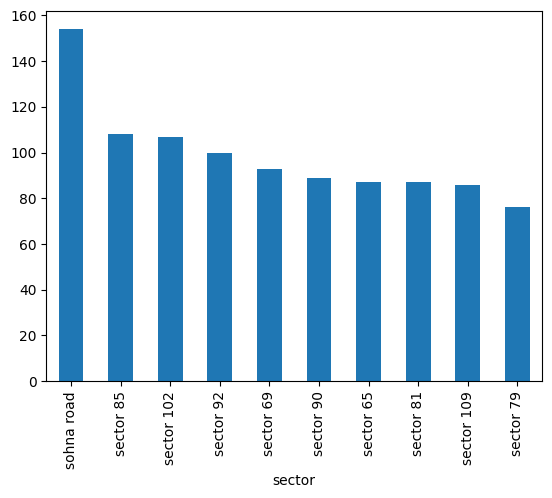

In [21]:
# top 10 sectors
df['sector'].value_counts().head(10).plot(kind='bar')

In [22]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': 3,
 'High (50-100)': 25,
 'Average (10-49)': 63,
 'Low (2-9)': 21,
 'Very Low (1)': 1}

#### Observations

- There are a total of 104 unique sectors in the dataset.
- Frequency distribution of sectors:
    - Very High (>100): 3 sectors have more than 100 listings.
    - High (50-100): 25 sectors have between 50 to 100 listings.
    - Average (10-49): A majority, 63 sectors, fall in this range with 10 to 49 listings each.
    - Low (2-9): 21 sectors have between 2 to 9 listings.
    - Very Low (1): Interestingly, there are no sectors with only 1 listing.

### Price
This is a very important column as it will become the output column

In [24]:
df['price'].isnull().sum()

17

In [26]:
df['price'].describe()
# ie this dataset tells that the mean price of a house in gurgaon is 2.5 crores, but it has some outliers
# std is 2.98 crore which is very high telling that the variance is high
# 25% properties 95 lakhs ya usse kam ki hai
# 50% properties ie median is 1.52 crores

count    3660.000000
mean        2.533664
std         2.980623
min         0.070000
25%         0.950000
50%         1.520000
75%         2.750000
max        31.500000
Name: price, dtype: float64

<Axes: xlabel='price', ylabel='Count'>

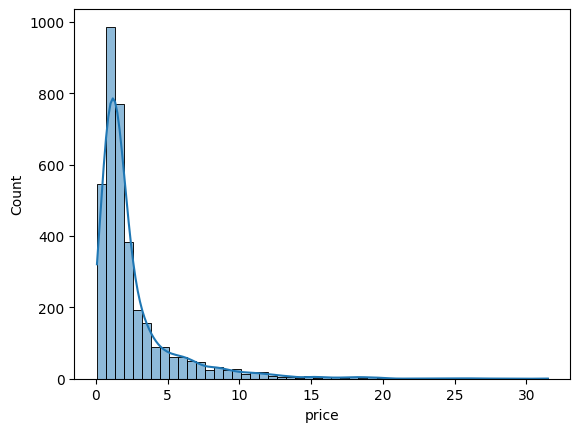

In [29]:
sns.histplot(df['price'], kde=True, bins=50)
# it tells that the data is right skewed ie the tail is towards the right
# this means most of the properties have low prices but very few properties have very high prices, therefore we can see this skewness

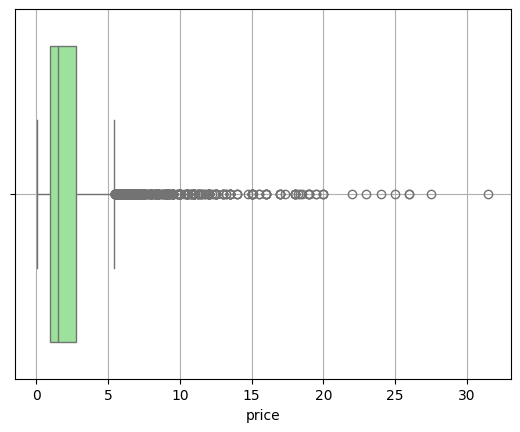

In [31]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

# box plot ye bol raha hai ki 5 crores ke aage outliers hai

- Descriptive Statistics:

    - Count: There are 3,660 non-missing price entries.
    - Mean Price: The average price is approximately 2.53 crores.
    - Median Price: The median (or 50th percentile) price is 1.52 crores.
    - Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.
    - Range: Prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.
    - IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.


- Visualizations:

    - Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.
    - Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.
 

- Missing Values: There are 17 missing values in the price column.

In [32]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()
# skewness tells how the data is skewed
# kurtosis tells ki aapke tail mein kitna heavyness hai ie outliers kitne hai data mein
print(skewness,kurtosis)

3.2791704733134615 14.933372629214254


**Skewness**: The price distribution has a skewness of approximately 3.28, indicating a positive skew. This means that the distribution tail is skewed to the right, which aligns with our observation from the histogram where most properties have prices on the lower end with a few high-priced properties.

**Kurtosis**: The kurtosis value is approximately 14.93. A kurtosis value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [33]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

0.01     0.250
0.05     0.370
0.95     8.500
0.99    15.264
Name: price, dtype: float64

Quantile Analysis:

- 1% Quantile: Only 1% of properties are priced below 0.25 crores.
- 5% Quantile: 5% of properties are priced below 0.37 crores.
- 95% Quantile: 95% of properties are priced below 8.5 crores.
- 99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [36]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1 # inter quartile range

IQR

1.8

In [37]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


In [39]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape
# too much outliers

(425, 23)

In [40]:
outliers['price'].describe()

count    425.000000
mean       9.235624
std        4.065259
min        5.460000
25%        6.460000
50%        8.000000
75%       10.750000
max       31.500000
Name: price, dtype: float64

Outliers Analysis (using IQR method):

- Based on the IQR method, there are 425 properties considered as outliers.
- These outliers have an average price of approximately 9.24 crores.
- The range for these outliers is from 5.46 crores to 31.5 crores.

<Axes: xlabel='price'>

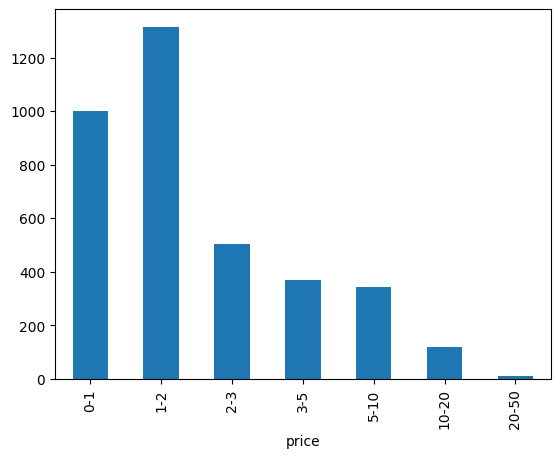

In [41]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

- The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.
- There's a significant drop in the number of properties priced above "5 crores."

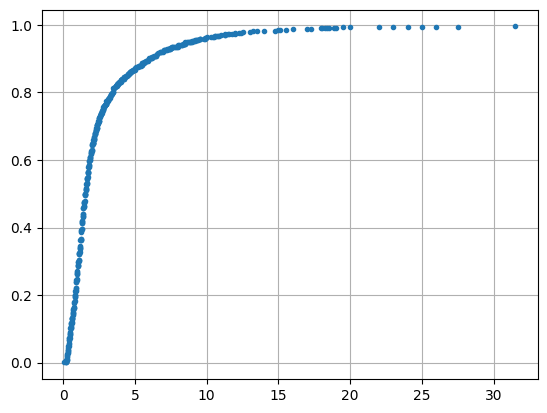

In [43]:
# ecdf plot - cummulative sum ka plot and uska percentage
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()

In [44]:
# whenever we have a right skewed data then to convert it to normal distribution, you use log transformation

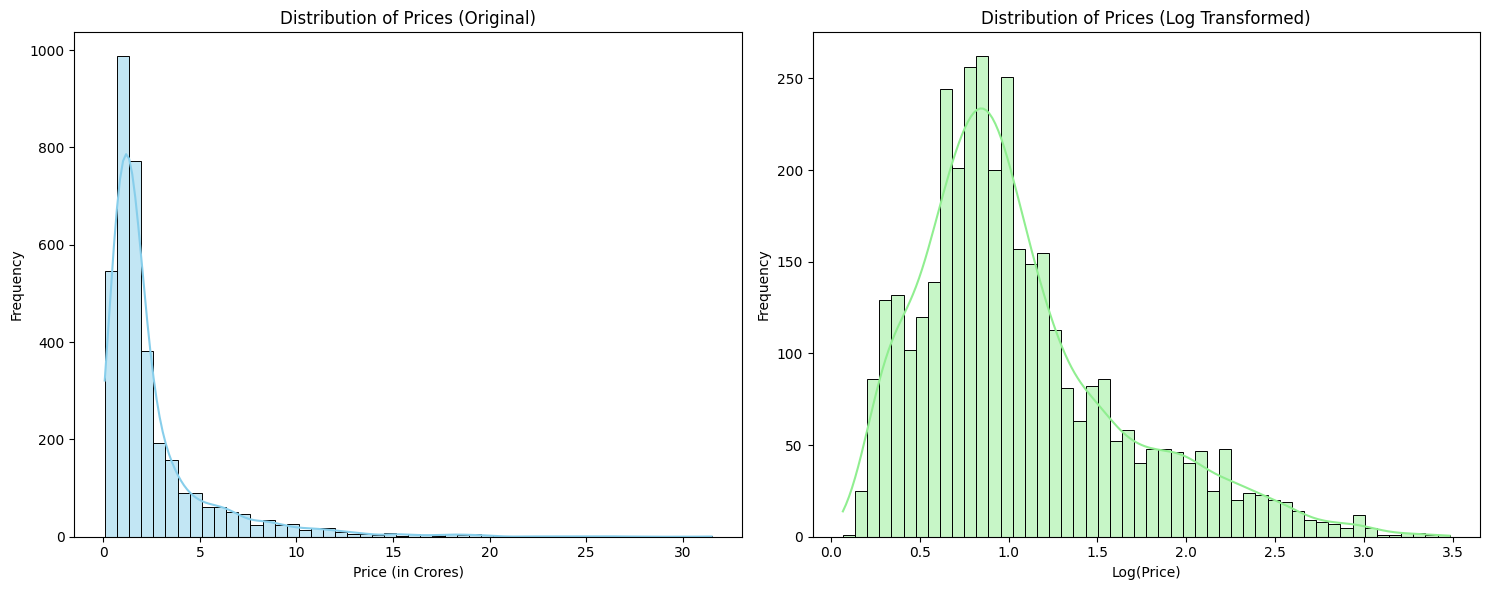

In [45]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [46]:
# the log transformed graph is kind of better as compared to the left graph

np.log1p(x): This function computes the natural logarithm of 1+x. 
It's designed to provide more accurate results for values of x that are very close to zero.

Using np.log1p helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

In [48]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0740709565255315 0.9646692415449296


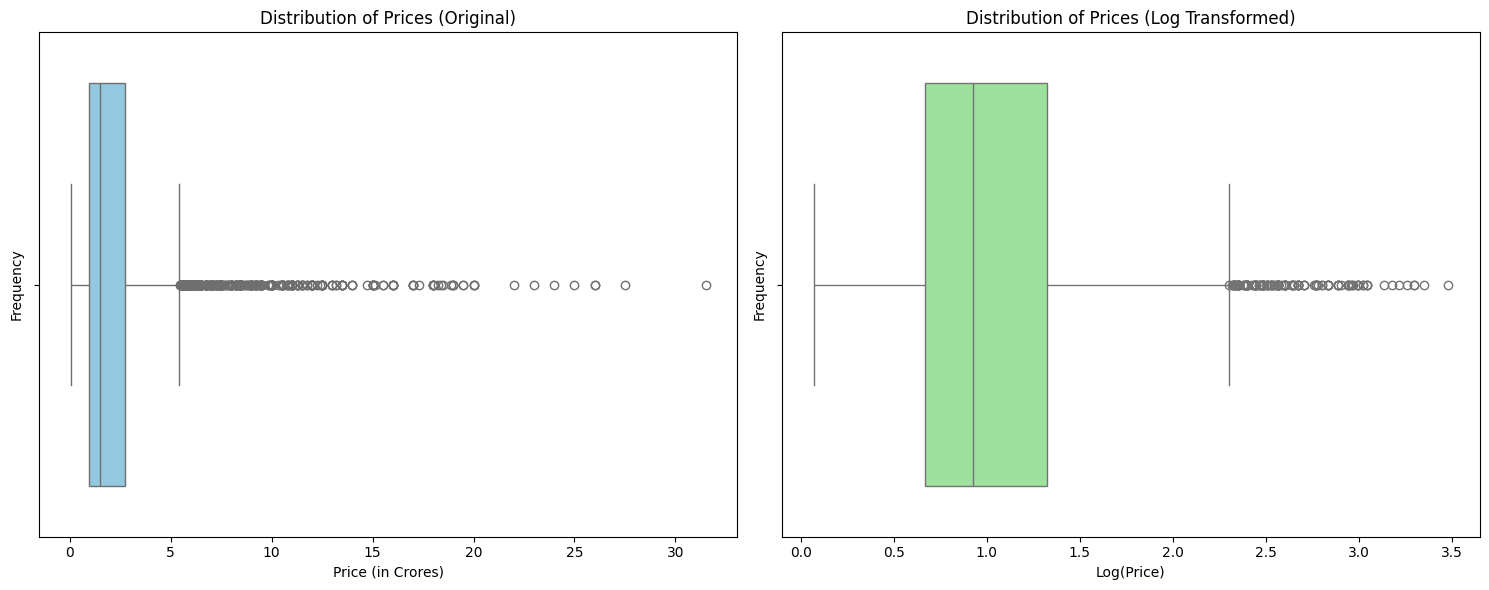

In [51]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(x=df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(x=np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [52]:
# we can observe from these box plots that after applying the log transform, the range got improved ie it became bigger and outliers are also reduced 
# in comparison to the left graph

### price_per_sqft

In [53]:
df['price_per_sqft'].isnull().sum()

17

In [55]:
df['price_per_sqft'].describe()
# mean is around 14000 which is very high price per sqft
# std is high showing high variance
# min is 4 ie this cannot happen, how can any property have price_per_sqft as 4
# max is also very high 6 lacs per sqft

count      3660.000000
mean      13892.668306
std       23210.067190
min           4.000000
25%        6817.250000
50%        9020.000000
75%       13880.500000
max      600000.000000
Name: price_per_sqft, dtype: float64

<Axes: xlabel='price_per_sqft', ylabel='Count'>

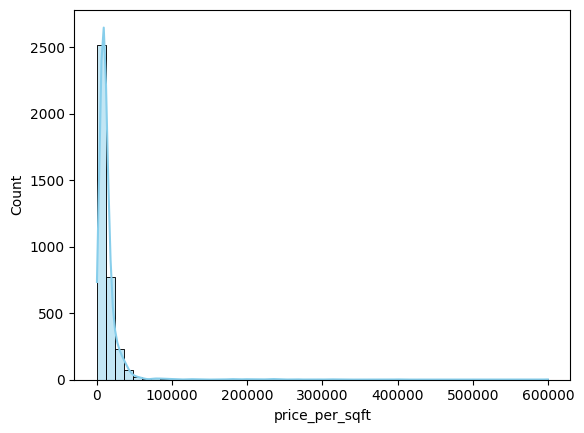

In [57]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

# this is also a right skewed data

Most properties have a price_per_sqft ranging between approximately ₹0 and ₹40,000. There is a significant concentration in the lower range, with a few properties having exceptionally high price_per_sqft.

<Axes: xlabel='price_per_sqft'>

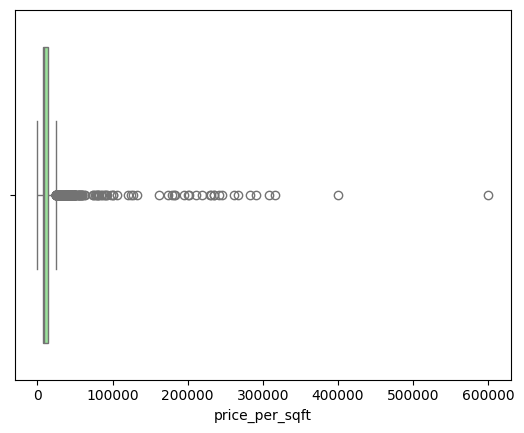

In [59]:
sns.boxplot(x=df['price_per_sqft'], color='lightgreen')

The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outliers

#### Observations

- Potential Outliers
- Right Skewed
- 17 missing values

### bedRoom

In [60]:
df['bedRoom'].isnull().sum()

0

<Axes: xlabel='bedRoom'>

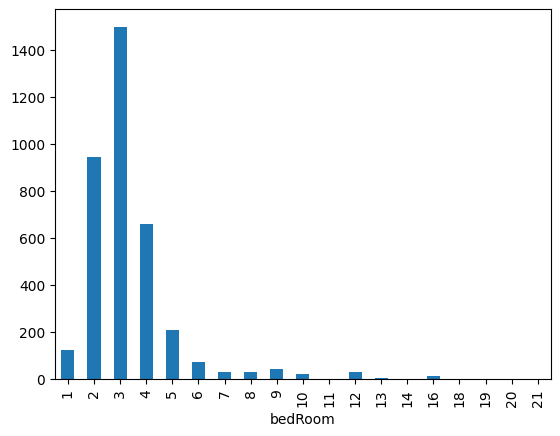

In [61]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='count'>

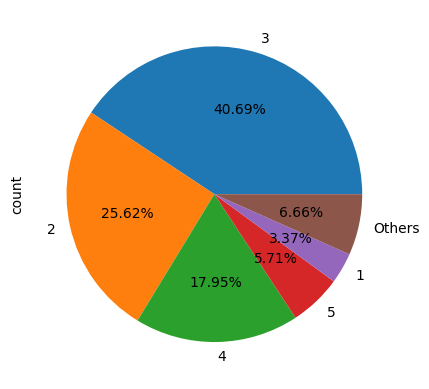

In [71]:
# Calculate value counts as proportions
bedroom_counts = df['bedRoom'].value_counts()

# Separate top 5 and combine the rest as 'Others'
top_5 = bedroom_counts[:5]
others = bedroom_counts[5:].sum()

# Append 'Others' category to top 5
top_5['Others'] = others

# Plot the pie chart
top_5.plot(kind='pie', autopct='%0.2f%%')

In [72]:
# df['bedRoom'].value_counts(normalize=True).head(6).plot(kind='pie',autopct='%0.2f%%')

### bathroom

In [73]:
df['bathroom'].isnull().sum()

0

<Axes: xlabel='bathroom'>

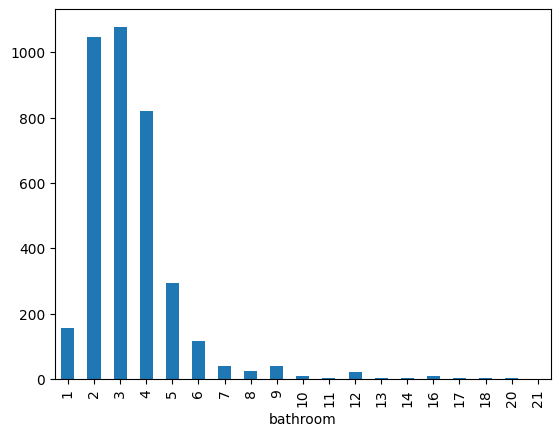

In [74]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

In [78]:
# df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

<Axes: ylabel='proportion'>

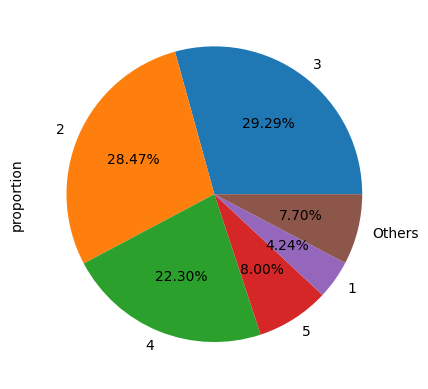

In [79]:
# Calculate value counts as proportions for the 'bathroom' column
bathroom_counts = df['bathroom'].value_counts(normalize=True)

# Separate top 5 and combine the rest as 'Others'
top_5_bathrooms = bathroom_counts[:5]
others_bathrooms = bathroom_counts[5:].sum()

# Append 'Others' category to top 5
top_5_bathrooms['Others'] = others_bathrooms

# Plot the pie chart
top_5_bathrooms.plot(kind='pie', autopct='%0.2f%%')


In [80]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,umang monsoon breeze,sector 78,0.75,6053.0,1239.0,Built Up area: 1239 (115.11 sq.m.)Carpet area:...,2,2,1,...,NaN,1239.0,1100.0,0,0,0,0,0,0,0
1,flat,ireo skyon,sector 60,2.15,23344.0,921.0,Super Built up area 1524(141.58 sq.m.)Built Up...,2,3,2,...,1524.0,1250.0,921.0,0,1,0,0,0,1,49
2,flat,dlf regal gardens,sector 90,1.23,7052.0,1744.0,Super Built up area 1744(162.02 sq.m.),3,3,2,...,1744.0,NaN,NaN,0,0,0,0,1,0,6
3,house,independent,sector 2,5.00,15384.0,3250.0,Carpet area: 3250 (301.93 sq.m.),6,6,2,...,NaN,NaN,3250.0,0,0,0,0,0,0,0
4,flat,dlf the arbour,sector 63,7.52,19000.0,3958.0,Built Up area: 3956 (367.52 sq.m.)Carpet area:...,4,4,3,...,NaN,3956.0,2200.0,0,0,0,0,0,0,61


### balcony

In [81]:
df['balcony'].isnull().sum()

0

<Axes: xlabel='balcony'>

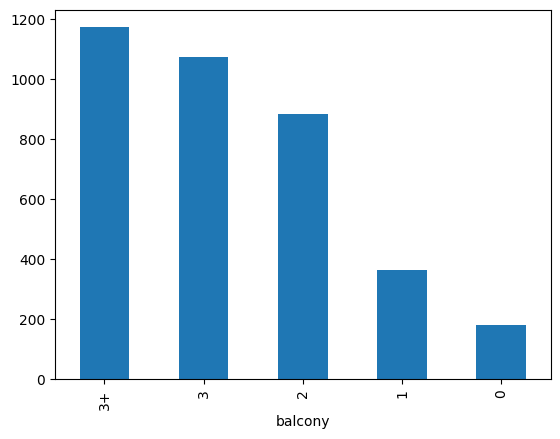

In [82]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

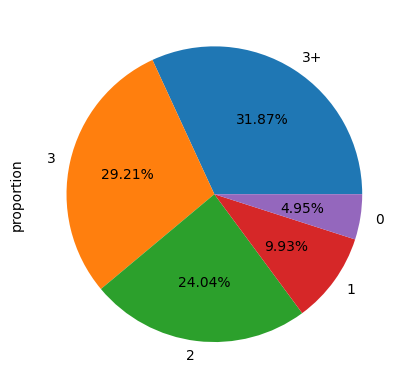

In [83]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

### floorNum

In [86]:
df.iloc[:,10:].head()

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,5.0,East,Undefined,NaN,1239.0,1100.0,0,0,0,0,0,0,0
1,5.0,East,Relatively New,1524.0,1250.0,921.0,0,1,0,0,0,1,49
2,19.0,North,Relatively New,1744.0,NaN,NaN,0,0,0,0,1,0,6
3,1.0,South,Undefined,NaN,NaN,3250.0,0,0,0,0,0,0,0
4,15.0,West,Undefined,NaN,3956.0,2200.0,0,0,0,0,0,0,61


In [87]:
df['floorNum'].isnull().sum()

19

In [89]:
df['floorNum'].describe()

count    3658.000000
mean        6.798250
std         6.012454
min         0.000000
25%         2.000000
50%         5.000000
75%        10.000000
max        51.000000
Name: floorNum, dtype: float64

In [90]:
# here we observe that on average the properties in gurgaon are on the 6th floor
# std is very high
# max value is 51 ie there is some flat which is on the 51st floor

<Axes: xlabel='floorNum'>

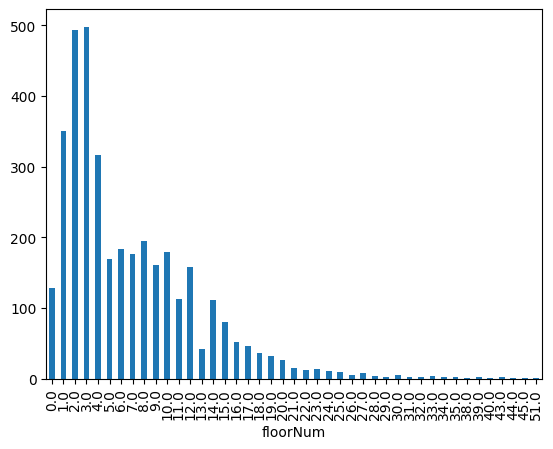

In [91]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: xlabel='floorNum'>

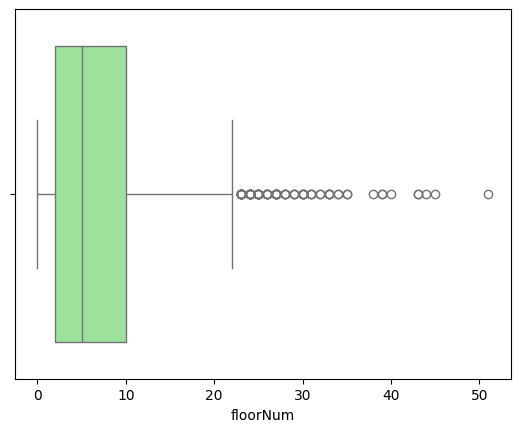

In [94]:
sns.boxplot(x=df['floorNum'], color='lightgreen')

- The majority of the properties lie between the ground floor (0) and the 25th floor.
- Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.
- There are a few properties located at higher floors, but their frequency is much lower.
- The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.
- Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

### facing

In [95]:
df['facing'].isnull().sum()

1045

In [96]:
df['facing'].fillna('NA',inplace=True)

C:\Users\Admin\AppData\Local\Temp\ipykernel_36476\3692945726.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['facing'].fillna('NA',inplace=True)


In [97]:
df['facing'].value_counts()

facing
NA            1045
East           623
North-East     623
North          387
West           249
South          231
North-West     193
South-East     173
South-West     153
Name: count, dtype: int64

### agePossession

In [98]:
df['agePossession'].isnull().sum()

0

In [99]:
df['agePossession'].value_counts()

agePossession
Relatively New        1646
New Property           593
Moderately Old         563
Undefined              306
Old Property           303
Under Construction     266
Name: count, dtype: int64

### areas - important column - we will use built up area mostly 

In [100]:
# super built up area
df['super_built_up_area'].isnull().sum()

1802

In [101]:
df['super_built_up_area'].describe()

count     1875.000000
mean      1925.237627
std        764.172177
min         89.000000
25%       1479.500000
50%       1828.000000
75%       2215.000000
max      10000.000000
Name: super_built_up_area, dtype: float64

<Axes: xlabel='super_built_up_area', ylabel='Count'>

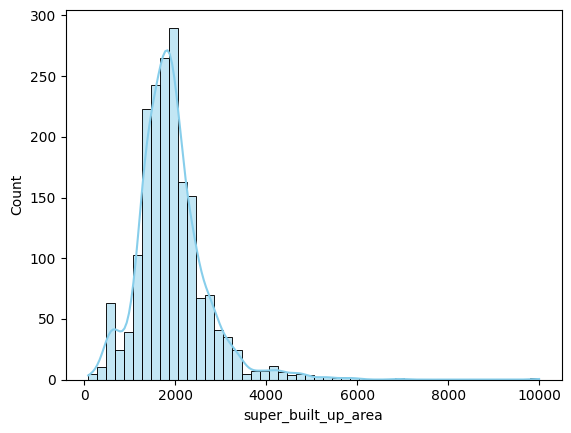

In [102]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: xlabel='super_built_up_area'>

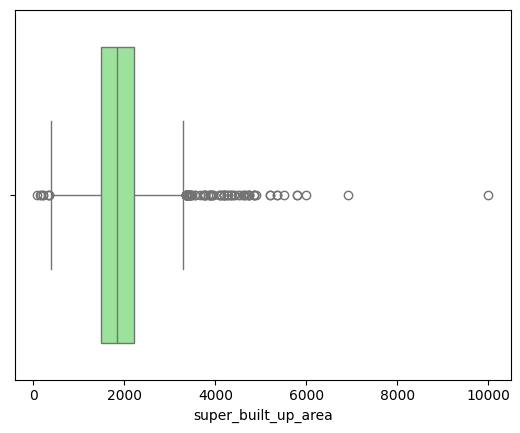

In [104]:
sns.boxplot(x=df['super_built_up_area'].dropna(), color='lightgreen')

- Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.
- There are a few properties with a significantly larger area, leading to a right-skewed distribution.
- The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.
- There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

In [105]:
# built up area
df['built_up_area'].isnull().sum()

1987

In [106]:
df['built_up_area'].describe()

count      1690.000000
mean       2379.585816
std       17942.880237
min           2.000000
25%        1100.000000
50%        1650.000000
75%        2400.000000
max      737147.000000
Name: built_up_area, dtype: float64

<Axes: xlabel='built_up_area', ylabel='Count'>

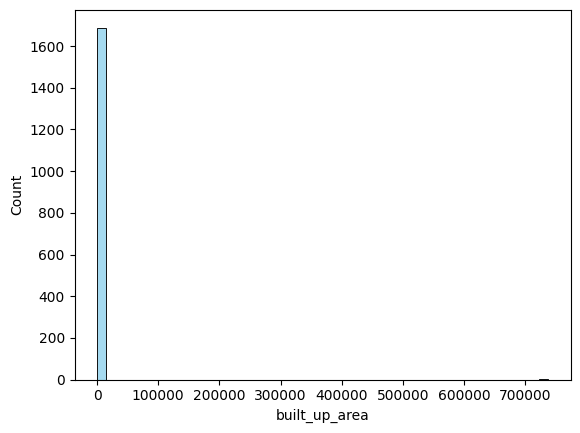

In [109]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: xlabel='built_up_area'>

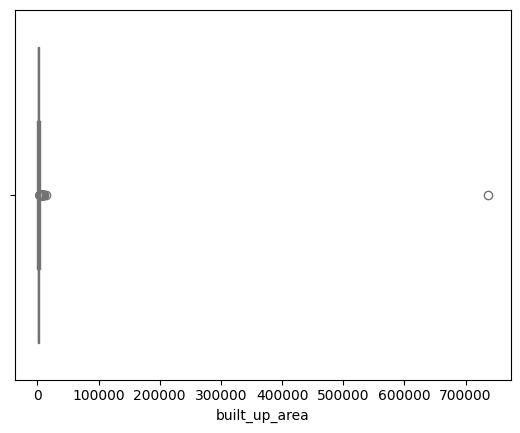

In [111]:
sns.boxplot(x=df['built_up_area'].dropna(), color='lightgreen')

- Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.
- There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.
- The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.


The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors. This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

In [113]:
# carpet area
df['carpet_area'].isnull().sum()

1805

In [114]:
df['carpet_area'].describe()

count      1872.000000
mean       2529.179507
std       22799.836449
min          15.000000
25%         843.000000
50%        1300.000000
75%        1790.000000
max      607936.000000
Name: carpet_area, dtype: float64

<Axes: xlabel='carpet_area', ylabel='Count'>

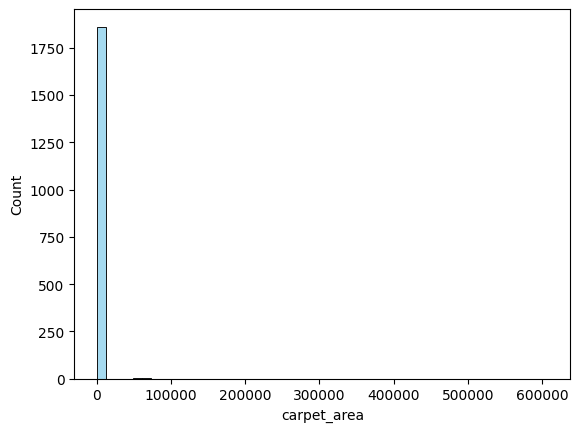

In [115]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: xlabel='carpet_area'>

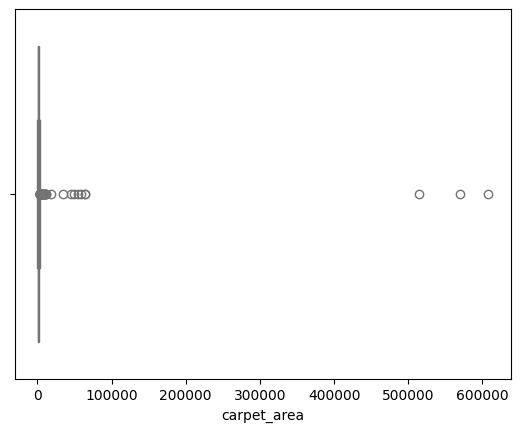

In [117]:
sns.boxplot(x=df['carpet_area'].dropna(), color='lightgreen')

In [118]:
df.iloc[:,16:]

,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,0,0,0,0,0,0
1,0,1,0,0,0,1,49
2,0,0,0,0,1,0,6
3,0,0,0,0,0,0,0
4,0,0,0,0,0,0,61
...,...,...,...,...,...,...,...
3798,0,0,0,1,0,2,44
3799,0,0,0,0,0,0,0
3800,0,1,0,0,0,1,174
3801,0,1,0,1,0,0,106


### additional rooms

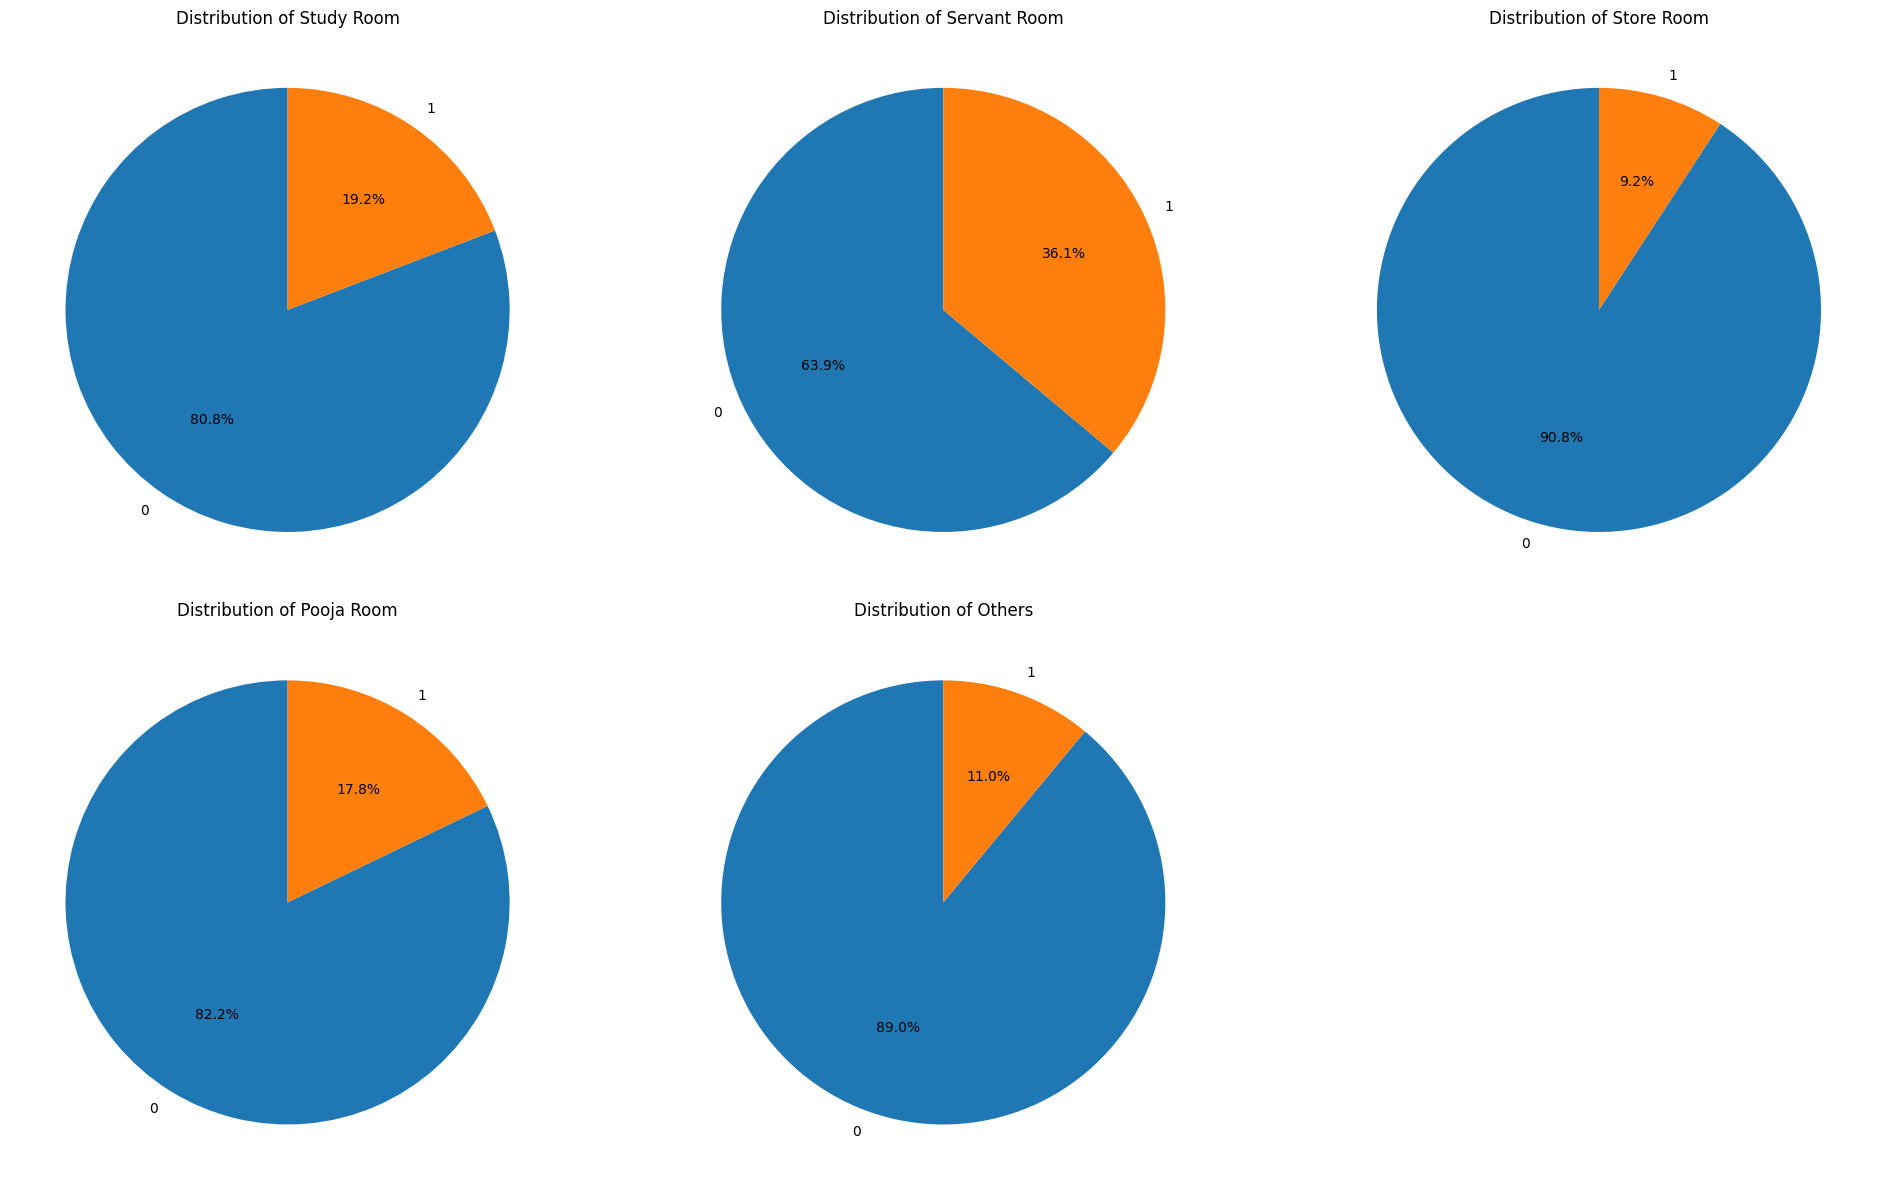

In [119]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

### furnishing_type

In [120]:
df['furnishing_type'].value_counts()
# 0 means unfurnished
# 1 means semi-furnished
# 2 means furnished

furnishing_type
0    2436
1    1038
2     203
Name: count, dtype: int64

<Axes: ylabel='count'>

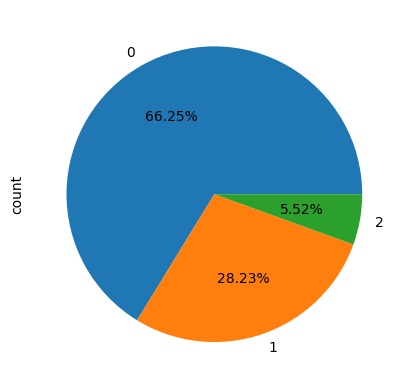

In [121]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

### luxury score

In [122]:
df['luxury_score'].isnull().sum()

0

In [123]:
df['luxury_score'].describe()

count    3677.000000
mean       71.512918
std        53.059082
min         0.000000
25%        31.000000
50%        59.000000
75%       110.000000
max       174.000000
Name: luxury_score, dtype: float64

<Axes: xlabel='luxury_score', ylabel='Count'>

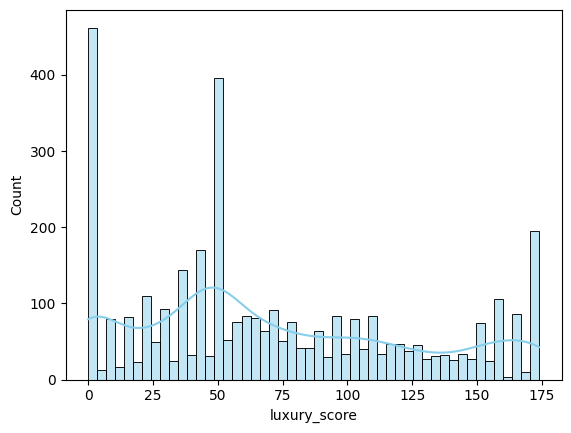

In [124]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: xlabel='luxury_score'>

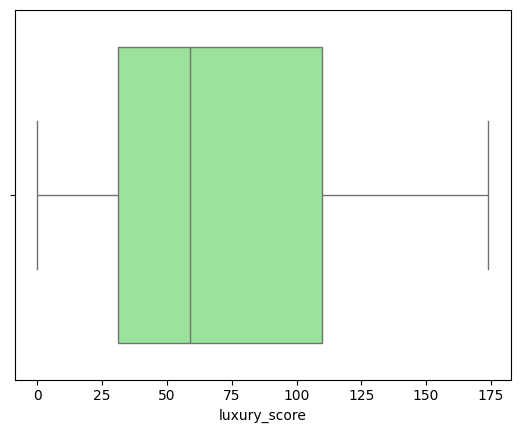

In [126]:
sns.boxplot(x=df['luxury_score'], color='lightgreen')

The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.

In [127]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,umang monsoon breeze,sector 78,0.75,6053.0,1239.0,Built Up area: 1239 (115.11 sq.m.)Carpet area:...,2,2,1,...,NaN,1239.0,1100.0,0,0,0,0,0,0,0
1,flat,ireo skyon,sector 60,2.15,23344.0,921.0,Super Built up area 1524(141.58 sq.m.)Built Up...,2,3,2,...,1524.0,1250.0,921.0,0,1,0,0,0,1,49
2,flat,dlf regal gardens,sector 90,1.23,7052.0,1744.0,Super Built up area 1744(162.02 sq.m.),3,3,2,...,1744.0,NaN,NaN,0,0,0,0,1,0,6
3,house,independent,sector 2,5.00,15384.0,3250.0,Carpet area: 3250 (301.93 sq.m.),6,6,2,...,NaN,NaN,3250.0,0,0,0,0,0,0,0
4,flat,dlf the arbour,sector 63,7.52,19000.0,3958.0,Built Up area: 3956 (367.52 sq.m.)Carpet area:...,4,4,3,...,NaN,3956.0,2200.0,0,0,0,0,0,0,61
